In [1]:
%matplotlib inline
from new_methods.new_methods import My_NuScenes
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os.path as osp
import pythreejs as pjs
import pickle
import math as mt

nusc = My_NuScenes(version='v1.0-mini', dataroot='/data/datasets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.264 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [12]:
radar_distance_total = []
lidar_distance_total = []

for i in tqdm(range(len(nusc.sample))):
    radar_pc = nusc.make_points_list('r', i, nsweeps=1).astype(np.float32)
    lidar_pc = nusc.make_points_list('l', i, nsweeps=1).astype(np.float32)

    radar_distance = [mt.sqrt(mt.pow(radar_pc[i][0], 2) + mt.pow(radar_pc[i][1], 2) + mt.pow(radar_pc[i][2], 2)) for i in range(len(radar_pc))]
    lidar_distance = [mt.sqrt(mt.pow(lidar_pc[i][0], 2) + mt.pow(lidar_pc[i][1], 2) + mt.pow(lidar_pc[i][2], 2)) for i in range(len(lidar_pc))]

    radar_distance_total.extend(radar_distance)
    lidar_distance_total.extend(lidar_distance)

100%|█████████████████████████████████████████| 404/404 [00:49<00:00,  8.08it/s]


Text(0.5, 1.0, 'number of lidar pointcloud in mini samples')

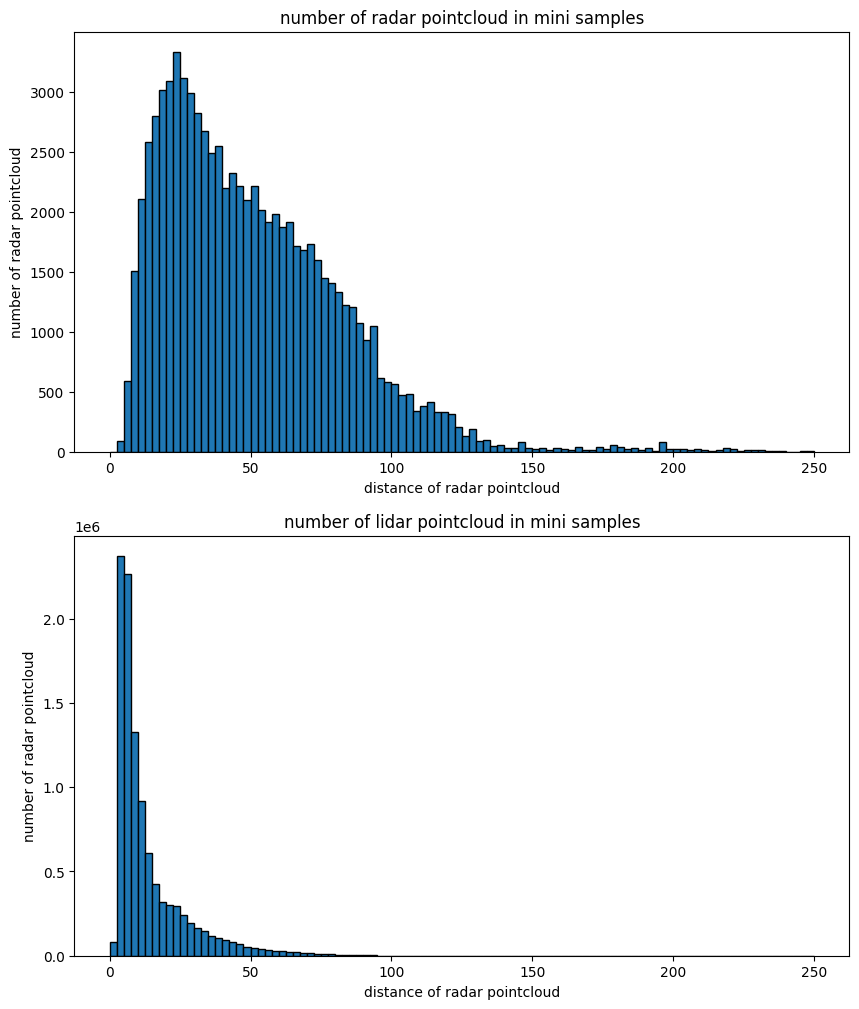

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,12))
bins = 100
hist_r, bin_edges_r = np.histogram(radar_distance_total, bins=bins, range=(0,250))#, density=True)
hist_l, bin_edges_l = np.histogram(lidar_distance_total, bins=bins, range=(0,250))#, density=True)

bar_centers_r = bin_edges_r[:-1] + np.diff(bin_edges_r) / 2
axes[0].bar(bar_centers_r, hist_r, width=np.diff(bin_edges_r), edgecolor='black')

bar_centers_l = bin_edges_l[:-1] + np.diff(bin_edges_l) / 2
plt.bar(bar_centers_l, hist_l, width=np.diff(bin_edges_l), edgecolor='black')

axes[0].set_xlabel('distance of radar pointcloud')
axes[0].set_ylabel('number of radar pointcloud')
# plt.ylim(0,20)
# plt.yticks(np.arange(0,21,1))
axes[0].set_title('number of radar pointcloud in mini samples')

axes[1].set_xlabel('distance of radar pointcloud')
axes[1].set_ylabel('number of radar pointcloud')
# plt.ylim(0,20)
# plt.yticks(np.arange(0,21,1))
axes[1].set_title('number of lidar pointcloud in mini samples')

In [17]:
count = 0
for distance in radar_distance_total:
    if distance > 51.2:
        count += 1
long_range_percentage = count*100/len(radar_distance_total)
long_range_percentage

42.599881789257914

In [18]:
count = 0
for distance in lidar_distance_total:
    if distance > 51.2:
        count += 1
long_range_percentage = count*100/len(lidar_distance_total)
long_range_percentage

2.6550025377753514